In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datosFull = np.loadtxt('notas_andes.dat', skiprows=1)
Y = datosFull[:,4]
X = datosFull[:,:4]

Sigma = 0.1*np.ones(len(Y))

In [3]:
def prior(betas):
    return np.prod((betas>=-10)*(betas<=10))

def evaluar(X,betas):
    coefs = betas[1:]
    interceptos = betas[0]
    return np.matmul(X,coefs)+interceptos

def log_verosimilitud_modelo(betas,X,Y,Sigma):
    const = np.log(1/(Sigma*np.sqrt(2*np.pi)))
    #print(np.matmul(X_k,betas)[0])
    delta = evaluar(X,betas) - Y
    chi2 = (delta/Sigma)**2
    return np.sum(const-chi2/2)

In [11]:
N = 300000
betas = [5*np.random.rand(5)-2.5]
log_pos = [np.log(prior(betas[0]))+log_verosimilitud_modelo(betas[0],X,Y,Sigma)]
for i in range(0,N):
    paso = np.random.normal(loc=0.0,scale=1.0,size=len(betas[i]))
    nuevos_betas = betas[i]+paso
    log_nuevo = np.log(prior(nuevos_betas))+log_verosimilitud_modelo(nuevos_betas,X,Y,Sigma)
    log_viejo = np.log(prior(betas[i]))+log_verosimilitud_modelo(betas[i],X,Y,Sigma)
    r = min(0,log_nuevo-log_viejo)
    alfa = np.random.rand()
    if np.exp(r)>=alfa:
        betas.append(nuevos_betas)
        log_pos.append(log_nuevo)
    else:
        betas.append(betas[i])
        log_pos.append(log_viejo)

[1.88010963 0.19023211 0.02161172 0.17456531 0.14951573]
Parámetro 0
Incertidumbre: 6.6857318127283e-07
Parámetro 1
Incertidumbre: 6.6857318127283e-07
Parámetro 2
Incertidumbre: 6.6857318127283e-07
Parámetro 3
Incertidumbre: 6.6857318127283e-07
Parámetro 4
Incertidumbre: 6.6857318127283e-07


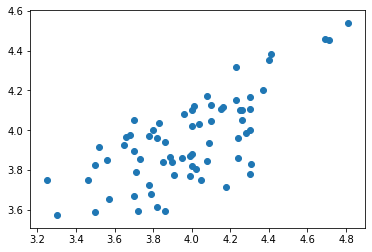

In [12]:
posCero = np.argmax(log_pos)
print(betas[posCero])
print(np.max)
for i in range(0,5):
    betaBest = betas[posCero]
    betaAnt = betaBest
    betaAnt[i]-=0.01
    betaPost = betaBest
    betaPost[i]+=0.01
    log_posteriorAnt = np.log(prior(betaAnt))+log_verosimilitud_modelo(betaAnt,X,Y,Sigma) + log_pos[posCero]
    log_posteriorPost = np.log(prior(betaPost))+log_verosimilitud_modelo(betaPost,X,Y,Sigma) + log_pos[posCero]
    
    d2 = (log_posteriorPost-2*log_pos[posCero]+log_posteriorAnt)/0.01**2
    Inc = (-d2)**-1
    print('Parámetro '+str(i))
    print('Incertidumbre: '+str(Inc))

plt.figure()
plt.scatter(Y,evaluar(X,betas[posCero]))